<a href="https://colab.research.google.com/github/matmnds/stud_python/blob/main/ab_testing__in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузка необходимых модулей/библиотек

In [ ]:
import random # модуль генерации случайных значений, необходимый для создания тестовых примеров и работы статистических тестов

import numpy as np # модуль работы с табличными данными, выраженными в виде матриц и массивов. Необходим для подсчета различных статистик типа среднего и стандартного отклонения
import pandas as pd # модуль работы с табличными данными, преобразующий их в дата фреймы
from scipy import stats # модуль работы с тестами, позволяет вызывать функции, вычисляющие статистики, необходимые для выводов о различии данных

import matplotlib.pyplot as plt # модуль работы с визуализацией, позволяющий генерировать графики, необходимые для работы - гистограммы, линейные графики и пр.

2. Загрузка данных, необходимых для работы

In [ ]:
# Загружаем обучающие данные с разделенными столбцами на контрольную и экспериментальную группы в виде датафрейма от pandas
data = pd.read_csv("ab_test_data.csv")

In [ ]:
data.head()

,control,treatment
0,1.15,2.93
1,1.15,3.24
2,1.07,4.05
3,1.15,3.50
4,0.93,4.27


In [ ]:
data.shape

(200, 2)

In [ ]:
# Выделяем контрольную и экспериментальные группы из датафрейма
control_group = data['control']
treatment_group = data['treatment']

In [ ]:
# Оценим размеры выборок
control_group.shape, treatment_group.shape

((200,), (200,))

In [ ]:
"""
В некоторых случаях нам может потребоваться вычисление базовых статистик, таких как среднее и стандратное отклонение.
Для их вычисления мы можем воспользоваться командами mean и std, которые позволяют провести эти вычисления. Эти команды могут быть использованы сразу на массиве, как в примере внизу,
так и отдельно через команды numpy.std() или numpy.mean().
"""
# вычисления средних
control_mean = control_group.mean()
treatment_mean = treatment_group.mean()

# вычисления стандартных отклонений
control_std = control_group.std()
treatment_std = treatment_group.std()

# Выведем значения полученных статистик
print(f"Контрольная группа. \nСреднее значение: {control_mean} \nСтандр. отклонение: {control_std}")
print(f"Экспериментальная группа. \nСреднее значение: {treatment_mean} \nСтандр. отклонение: {treatment_std}")


Контрольная группа. 
Среднее значение: 1.7345499999999998 
Стандр. отклонение: 0.5755965203780828
Экспериментальная группа. 
Среднее значение: 3.1433 
Стандр. отклонение: 0.561596888636888


In [ ]:
round(1.7345499999999998, 3)

1.735

3. Визуализация данных для оценки их свойств

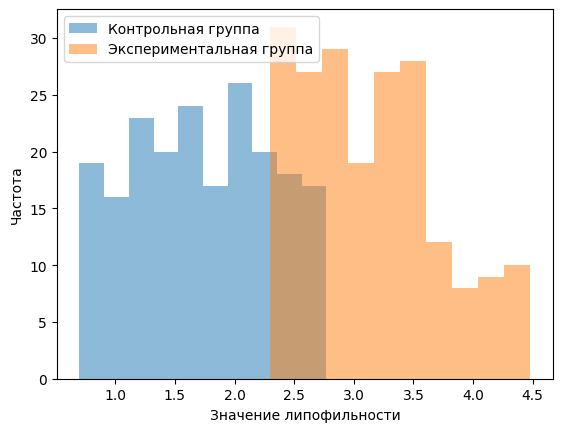

In [ ]:
# Построим гистограммы
plt.hist(control_group, alpha=0.5, label='Контрольная группа')
plt.hist(treatment_group, alpha=0.5, label='Экспериментальная группа')

# Добавим легенду и подпишем оси
plt.legend()
plt.xlabel('Значение липофильности')
plt.ylabel('Частота')

# Покажем графики
plt.show()


4. Вычисление t-статистик и p-значений

In [ ]:
"""
Используем t-test функцию из модуля stats для сравнения контрольной и экспериментальной группы.

"""
# Вызов функции с аргументами, где входами являются контрольная и экспериментальная группы
t, p = stats.ttest_ind(control_group, treatment_group)

# Проинтерпретируем  получившиеся p-значения
if p < 0.05:
    print("Разница между группами статистически значима.")
else:
    print("Разница между группами статистически незначима.")

# Вычислим разницу между средними для оценки, насколько две выборки различаются
lift = treatment_mean - control_mean
print("Разница между средними:", lift)


Разница между группами статистически значима.
Разница между средними: 1.4087500000000002


In [ ]:
"""
В некоторых случаях нам удобно использовать функции, имеющие удобный для пользователя интерфейс.
Например, быть вызываемыми по имени и получать на вход набор выборок, которые необходимо сравнить

"""

def ab_test(groupA, groupB):
    # Вычислим двухвыборочный t-тест
    t, p = stats.ttest_ind(groupA, groupB)

    # Вычислим средние и стандартные отклонения
    meanA = np.mean(groupA)
    meanB = np.mean(groupB)
    stdA = np.std(groupA)
    stdB = np.std(groupB)


    # Напечатаем результаты
    print(f"Группа A: Mean={meanA:.2f}, Std. Dev.={stdA:.2f}")
    print(f"Группа B: Mean={meanB:.2f}, Std. Dev.={stdB:.2f}")
    print(f"t-статистика: {t:.2f}")
    print(f"p-значение: {p:.4f}")

    # Интерпретируем результаты
    if p < 0.05:
        print("Отбросим нулевую гипотезу, группы различаются")
    else:
     print("Невозможно отбросить нулевую гипотезу, группы не разные")

In [ ]:
"""
Сгенерируем выборки случайным образом и оценим работу написанной свыше функции.
Сделаем это с помощью модуля random и его функции randint, работа которой заключается
в генерировании случайных целочисленных значений

"""
groupA = [random.randint(0, 100) for i in range(50)]
groupB = [random.randint(0, 100) for i in range(50)]

# Оценим выборки, полученные в результате создания случайных массивов данных
ab_test(groupA, groupB)

# Оценим выборки, полученные в результате A/B тестирования
ab_test(control_group, treatment_group)

Группа A: Mean=51.72, Std. Dev.=28.91
Группа B: Mean=57.30, Std. Dev.=27.05
t-статистика: -0.99
p-значение: 0.3263
Невозможно отбросить нулевую гипотезу, группы не разные
Группа A: Mean=1.73, Std. Dev.=0.57
Группа B: Mean=3.14, Std. Dev.=0.56
t-статистика: -24.77
p-значение: 0.0000
Отбросим нулевую гипотезу, группы различаются


5. Функция расчета различных статистических тестов

In [ ]:
"""
Также в случае различных свойств данных крайне удобно передавать на вход функции желаемый для использования тест.
Это можно реализовать с помощью переменной test, которая имеет заранее определенное число значений (вариантов), и пользователю нужно лишь
описать все возможные варианты в связи с выбранным значением переменной test
"""

def ab_test(groupA, groupB, test='t'):

    # Конструкция, позволяющая выбрать необходимый тест в зависимости от поданных значений аргументов
    if test == 't':
        # Независимый двух-выборочный t-test
        t, p = stats.ttest_ind(groupA, groupB)
        test_name = "Независимый двух-выборочный t-test"
    elif test == 'w':
        # Тест Манна-Уитни
        u, p = stats.mannwhitneyu(groupA, groupB)
        test_name = "Тест Манна-Уитни"
    elif test == 'p':
        # Т-критерий Уилкоксона
        z, p = stats.wilcoxon(groupA, groupB)
        test_name = "Т-критерий Уилкоксона"
    else:
        print("Неизвестный тест либо тест не задан")
        return

    # Вычисление средних значений и стандартных отклонений
    meanA = np.mean(groupA)
    meanB = np.mean(groupB)
    stdA = np.std(groupA)
    stdB = np.std(groupB)

    # Вывод результатов
    print(f"{test_name}:")
    print(f"Группа A: Mean={meanA:.2f}, Std. Dev.={stdA:.2f}")
    print(f"Группа B: Mean={meanB:.2f}, Std. Dev.={stdB:.2f}")
    if test == 't':
        print(f"t-statistic: {t:.2f}")
    elif test == 'w':
        print(f"U-statistic: {u:.2f}")
    elif test == 'p':
        print(f"z-statistic: {z:.2f}")
    print(f"p-value: {p:.4f}")

    # Интерпретируем результаты
    if p < 0.05:
        print("Отбрасываем нулевую гипотезу, группы отличаются")
    else:
        print("Невозможно отбросить нулевую гипотезу, группы не отличаются!")


In [ ]:
# Сгенерированные данные
groupA = [random.randint(0, 100) for i in range(50)]
groupB = [random.randint(0, 100) for i in range(50)]

# Проведем A/B тестирование с различными статистическими тестами
ab_test(groupA, groupB, test='t')
print()
ab_test(groupA, groupB, test='w')
print()
ab_test(groupA, groupB, test='p')


Независимый двух-выборочный t-test:
Группа A: Mean=51.38, Std. Dev.=26.49
Группа B: Mean=48.50, Std. Dev.=30.57
t-statistic: 0.50
p-value: 0.6193
Невозможно отбросить нулевую гипотезу, группы не отличаются!

Тест Манна-Уитни:
Группа A: Mean=51.38, Std. Dev.=26.49
Группа B: Mean=48.50, Std. Dev.=30.57
U-statistic: 1324.00
p-value: 0.6123
Невозможно отбросить нулевую гипотезу, группы не отличаются!

Т-критерий Уилкоксона:
Группа A: Mean=51.38, Std. Dev.=26.49
Группа B: Mean=48.50, Std. Dev.=30.57
z-statistic: 565.00
p-value: 0.4903
Невозможно отбросить нулевую гипотезу, группы не отличаются!


In [ ]:
# Проведем A/B тестирование с различными статистическими тестами
ab_test(control_group, treatment_group, test='t')
print()
ab_test(control_group, treatment_group, test='w')
print()
ab_test(control_group, treatment_group, test='p')


Независимый двух-выборочный t-test:
Группа A: Mean=1.73, Std. Dev.=0.57
Группа B: Mean=3.14, Std. Dev.=0.56
t-statistic: -24.77
p-value: 0.0000
Отбрасываем нулевую гипотезу, группы отличаются

Тест Манна-Уитни:
Группа A: Mean=1.73, Std. Dev.=0.57
Группа B: Mean=3.14, Std. Dev.=0.56
U-statistic: 1239.50
p-value: 0.0000
Отбрасываем нулевую гипотезу, группы отличаются

Т-критерий Уилкоксона:
Группа A: Mean=1.73, Std. Dev.=0.57
Группа B: Mean=3.14, Std. Dev.=0.56
z-statistic: 75.00
p-value: 0.0000
Отбрасываем нулевую гипотезу, группы отличаются


Выводы по ноутбуку:


*   Первым делом при работе с данными необходимо визуализировать их и, если необходимо, то провести требуемую предобработку, чтобы убрать выбросы, ошибки и прочее, что не подпадает под постановку задачи
*   Оценка статистик выборок (экспериментальной и контрольной) позволяет понять предварительно, насколько различаются данные до и после внесения какого-либо изменения
*   Для более точной оценки разницы между распределениями лучше использовать t-статистику, которая позволяет оценить p значение, которое может сказать о том, как сильно различаются данные. Однако данный тест исходит из предположения о нормальности исследуемых выборок
* Важно также помнить, что окончательные выводы делаются с учетом специфики самой задачи, т.е. с учетом принципов выбора наилучшего кандидата (лекарства) на основе не только собранной статистики

